In [1]:
# 2015-2016 Stats

In [1]:
# --- Imports ---
import datetime as dt
import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns
import re
from scipy import stats
from pylab import *
from sklearn.neighbors import KernelDensity
%matplotlib inline

    

C:\Users\Ryan\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def stats_to_display(data):
    n, min_max, mean, var, skew, kurt = stats.describe(data)
    print("Number of elements: {0:d}".format(n))
    print("Minimum: {0:8.6f} Maximum: {1:8.6f}".format(min_max[0], min_max[1]))
    print("Mean: {0:8.6f}".format(mean))
    print("Standard Deviation: {0:8.6f}".format(np.std(data)))
    print("Variance: {0:8.6f}".format(var))
    print("Skew : {0:8.6f}".format(skew))
    print("Kurtosis: {0:8.6f}".format(kurt))
    nmbr_std  = (min_max[1] - mean)/np.std(data)
    print("Number of Standard Deviations the Max is from mean: {0:8.6f}".format(nmbr_std))

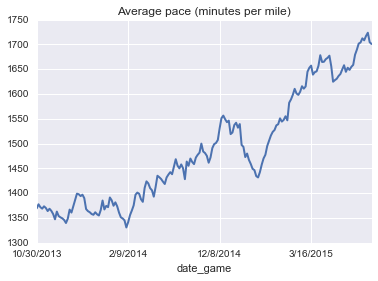

In [4]:
# Testing
filename = 'ELO_Last_2_Seasons.csv'
df_538 = pd.read_csv(filename, na_values=['na'],index_col='date_game')
#print df_538['fran_id']
df_cavs = df_538[df_538['fran_id'] == 'Cavaliers'];
df_cavs['elo_i'].plot(title='Average pace (minutes per mile)',lw=2);
#plt.plot(df_cavs['elo_i'])

<type 'list'>


AttributeError: 'list' object has no attribute 'T'

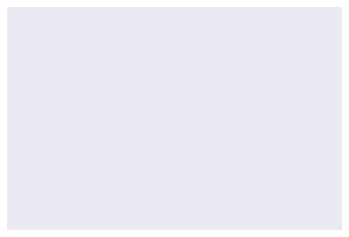

In [102]:
# Create numpy array with each teams ELO 
ELO = []
teams = df_538['fran_id'].unique()
for team in teams:
    temp = df_538[df_538['fran_id'] == team]
    
    # Take out playoffs
    temp = temp[temp['is_playoffs'] == 0]
    ELO.append(np.array(temp['elo_i']))
#print df_538['is_playoffs']
x = np.linspace(0, 10, 100)
print type(ELO)
fig, ax = plt.subplots(subplot_kw={'xticks': [], 'yticks': []})
lines = ax.plot(x,ELO.T, color='blue', lw=4, alpha=0.1)

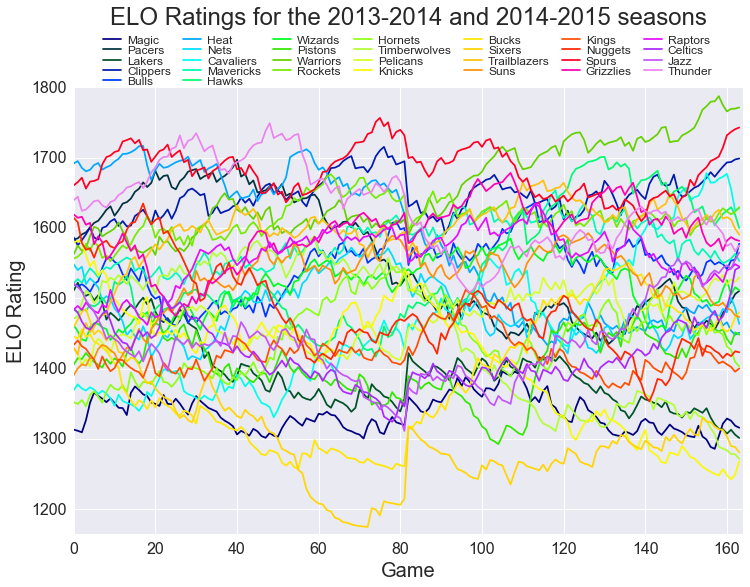

In [213]:
# http://stackoverflow.com/questions/4805048/how-to-get-different-colored-lines-for-different-plots-in-a-single-figure
num_teams = len(teams)
# Have a look at the colormaps here and decide which one you'd like:
# http://matplotlib.org/1.2.1/examples/pylab_examples/show_colormaps.html
fig = plt.figure(figsize=(12, 8), dpi=300,facecolor = "white")
fig.set_facecolor('white')
colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])

# Plot several different functions...

x = np.arange(10)
mp = []
labels = []
for i in range(0, num_teams):
    line, = plt.plot(ELO[i])
    fig.set_facecolor('white')
    labels.append(teams[i])
    temp = mpld3.plugins.LineLabelTooltip(line, label=teams[i])
    mp.append(temp)

# I'm basically just demonstrating several different legend options here...
plt.legend(labels, ncol=7, loc='center right', 
           bbox_to_anchor=[0.97, 1.06], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.5, handlelength=1.5,
           fancybox=True, shadow=True,prop={'size':12})
plt.xlabel('Game',fontsize = 20)
axes = plt.gca()
axes.set_xlim([0,164])
axes.set_ylim([1165,1800])
plt.xticks(size=16)
plt.yticks(size=16)
plt.ylabel('ELO Rating',fontsize = 20)
plt.title('ELO Ratings for the 2013-2014 and 2014-2015 seasons',y=1.13,fontsize = 24)
#df.myCol.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('ELO_2Seasons.png', bbox_inches='tight')
plt.show()

In [83]:
x = np.arange(10)
mp = []
labels = []
colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])
for i in range(0, num_plots):
    line, = plt.plot(ELO[i])
    labels.append(teams[i])
    temp = mpld3.plugins.LineLabelTooltip(line, label=teams[i])
    mp.append(temp)
mpld3.plugins.connect(plt.gcf(), mp[0],mp[1],mp[2],mp[3],mp[4],mp[5],mp[6],mp[7])
mpld3.display()

From Wikipedia: A six sigma process is one in which 99.99966% of all opportunities to produce some feature of a part are statistically expected to be free of defects (3.4 defective features per million opportunities)

In [8]:
# 4.130983 is 99.9936% within interval ... or there is a 0.006% a data point is within 4 standard deviations, but this is a two-sided
# statistic so divide by 2...that is 0.003% chance all data (pos) is inside (mean,4sigma). This is a probability of 0.00003 and
# the fraction outsided (two-side) is 1 / 15787 and so the one-sided is double that 1 / (15787*2) or 1/ 31574. This means that 
# Steph Curry's season will happen 1 time for every 31,574 statistal seasons. If there are about 350 qualified player seasons per year
# then this happens every 90 NBA seasons. And this is an underestimate. 

Rk
Team
Wins
Losses
G
MP
FG
FGA
FG%
3P
3PA
3P%
2P
2PA
2P%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS
PTS/G
Number of elements: 30
Minimum: 152.000000 Maximum: 366.000000
Mean: 242.466667
Standard Deviation: 47.477527
Variance: 2331.843678
Skew : 0.144792
Kurtosis: 0.294957
Number of Standard Deviations the Max is from mean: 2.601933


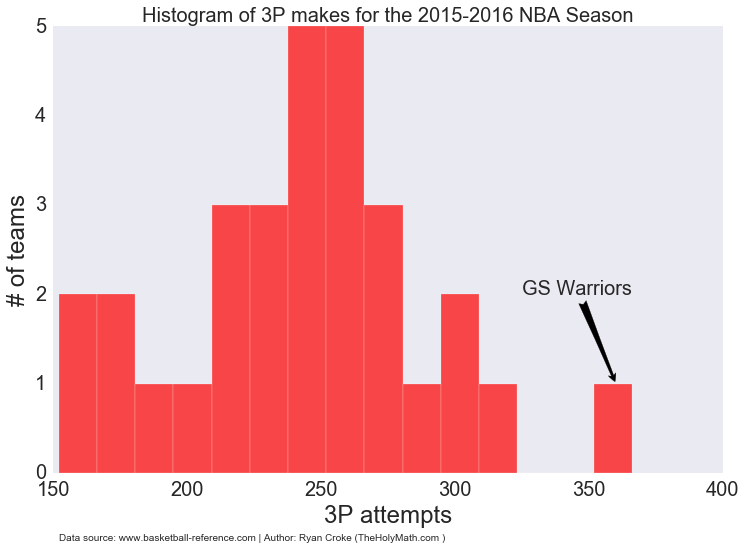

In [119]:
filename = '2015_2016_Team_stats.csv'
df_team = pd.read_csv(filename, na_values=['na'])
for keys in df_team.keys():
    print keys
stats_to_display(df_team['3P'])

hist, bins = np.histogram(df_team['3P'], bins=15)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(12, 8), dpi=300)
plt.bar(center, hist, align='center', width=width,alpha=0.7,facecolor="red",edgecolor='w')
plt.xlabel('3P attempts',fontsize=24)
plt.ylabel('# of teams',fontsize=24)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Histogram of 3P makes for the 2015-2016 NBA Season',fontsize=20)
plt.annotate('GS Warriors', xy=(360, 1), xytext=(325, 2),fontsize=20,
            arrowprops=dict(arrowstyle="fancy",connectionstyle="arc3",facecolor='black'),)
plt.text(min(df_team['3P']),-0.75, "Data source: www.basketball-reference.com | "  "Author: Ryan Croke (TheHolyMath.com )", fontsize=10)
plt.grid(False)
plt.axis(bgcolor='white')
plt.savefig('Histogram_3P.png', bbox_inches='tight')
plt.show()

Number of elements: 30
Minimum: 748.000000 Maximum: 1018.000000
Mean: 856.966667
Standard Deviation: 68.182834
Variance: 4809.205747
Skew : 0.376105
Kurtosis: -0.461810
Number of Standard Deviations the Max is from mean: 2.361787


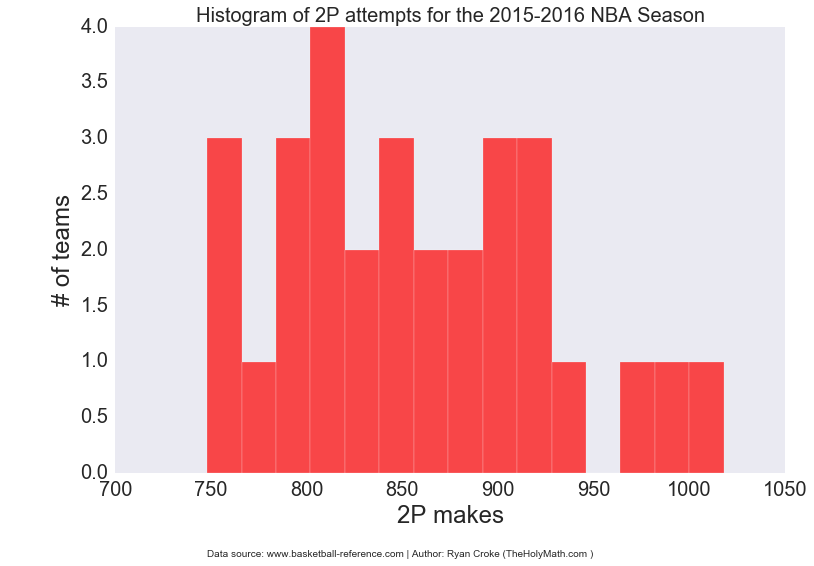

In [120]:
stats_to_display(df_team['2P'])

hist, bins = np.histogram(df_team['2P'], bins=15)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(12, 8), dpi=300)
plt.bar(center, hist, align='center', width=width,alpha=0.7,facecolor="red",edgecolor='w')
plt.xlabel('2P makes',fontsize=24)
plt.ylabel('# of teams',fontsize=24)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Histogram of 2P attempts for the 2015-2016 NBA Season',fontsize=20)
plt.annotate('GS Warriors', xy=(360, 1), xytext=(325, 2),fontsize=20,
            arrowprops=dict(arrowstyle="fancy",connectionstyle="arc3",facecolor='black'),)
plt.text(min(df_team['2P']),-0.75, "Data source: www.basketball-reference.com | "  "Author: Ryan Croke (TheHolyMath.com )", fontsize=10)
plt.grid(False)
plt.axis(bgcolor='white')
plt.savefig('Histogram_2P.png', bbox_inches='tight')
plt.show()

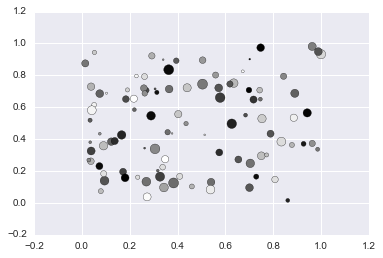

In [172]:
from matplotlib.pyplot import figure, show
import numpy as npy
from numpy.random import rand


if 1: # picking on a scatter plot (matplotlib.collections.RegularPolyCollection)

    x, y, c, s = rand(4, 100)
    def onpick3(event):
        ind = event.ind
        print 'onpick3 scatter:', ind, npy.take(x, ind), npy.take(y, ind)

    fig = figure()
    ax1 = fig.add_subplot(111)
    col = ax1.scatter(x, y, 100*s, c, picker=True)
    fig.savefig('pscoll.png')
    fig.canvas.mpl_connect('pick_event', onpick3)

show()

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#FFFFFF'))
N = len(df_team)
c_col = np.random.random(size=N)
scatter = ax.scatter(df_team['2P'],
                     df_team['3P'],
                     c=c_col,
                     s=np.ones(N)*1000,
                     alpha=0.3,
                     cmap=plt.cm.jet)
#x.grid(color='grey', linestyle='--')

ax.set_title("2P made vs. 3P made", size=24)
ax.set_xlabel("2P made",size=16)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_ylabel("3P made", size=16)
ax.text(825,360, "GS Warriors", fontsize=16)
ax.text(701,105, "Data source: www.basketball-reference.com |"  "Author: Ryan Croke TheHolyMath.com", fontsize=10)
#ax.annotate('GS Warriors', xy=(360, 850))
#ax.text(200,800,'GS Warriors',ha = 'right', va = 'bottom',size=20)

labels = [df_team['Team'][i] for i in range(N)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.save_html(fig, '2Pv3P.html')

mpld3.display()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#FFFFFF'))
N = len(df_team)

scatter = ax.scatter(df_team['2PA'],
                     df_team['3PA'],
                     c=c_col,
                     s=np.ones(N)*1000,
                     alpha=0.3,
                     cmap=plt.cm.jet)
#x.grid(color='grey', linestyle='--')

ax.set_title("2P attempts vs. 3P attempts", size=24)
ax.set_xlabel("2P attempts",size=16)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_ylabel("3P attempts", size=16)
ax.text(1575,865, "GS Warriors", fontsize=16)
ax.text(1401,405, "Data source: www.basketball-reference.com |"  "Author: Ryan Croke TheHolyMath", fontsize=10)

labels = [df_team['Team'][i] for i in range(N)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.save_html(fig, '2PAv3PA.html')

mpld3.display()

In [7]:

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#FFFFFF'))
N = len(df_team)

scatter = ax.scatter(df_team['3PA'],
                     df_team['3P'],
                     c=c_col,
                     s=np.ones(N)*1000,
                     alpha=0.3,
                     cmap=plt.cm.jet)
#x.grid(color='grey', linestyle='--')

ax.set_title("3P made vs. 3P attempts", size=24)
ax.set_xlabel("3P attempts",size=16)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_ylabel("3P made", fontweight='bold',size=16)
ax.text(825,360, "GS Warriors", fontsize=16)
ax.text(401,105, "Data source: www.basketball-reference.com |"  "Author: Ryan Croke TheHolyMath", fontsize=10)

labels = [df_team['Team'][i] for i in range(N)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.save_html(fig, '3Pv3PA.html')

mpld3.display()

In [8]:

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#FFFFFF'))
N = len(df_team)

scatter = ax.scatter(df_team['2P%'],
                     df_team['3P%'],
                     c=c_col,
                     s=np.ones(N)*1000,
                     alpha=0.3,
                     cmap=plt.cm.jet)
#x.grid(color='grey', linestyle='--')

ax.set_title("2P % vs. 3P %", size=24)
ax.set_xlabel("2P %",size=16)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_ylabel("3P %", fontweight='bold',size=16)
ax.text(0.5,0.41, "GS Warriors", fontsize=16)
#ax.text(401,105, "Data source: www.basketball-reference.com |"  "Author: Ryan Croke TheHolyMath", fontsize=10)

labels = [df_team['Team'][i] for i in range(N)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.save_html(fig, '2PPv3PP.html')

mpld3.display()

# How to embed in website

* mpld3.save_html(fig, 'name.html') - saves as an html
* copy the html source code into a custom field in Wordpress - example: CODE1
* In WYSIWIG use %CODE1% to embed

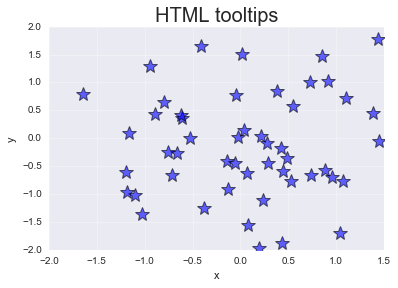

In [83]:

fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)

N = 50
df = pd.DataFrame(index=range(N))
df['x'] = np.random.randn(N)
df['y'] = np.random.randn(N)
df['z'] = np.random.randn(N)

labels = []
for i in range(N):
    label = df.ix[[i], :].T
    label.columns = ['Row {0}'.format(i)]
    # .to_html() is unicode; so make leading 'u' go away with str()
    labels.append(str(label.to_html()))

points = ax.plot(df.x, df.y, '*', color='b',
                 mec='k', ms=15, mew=1, alpha=.6)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('HTML tooltips', size=20)

tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                   voffset=10, hoffset=10)
mpld3.plugins.connect(fig, tooltip)

#displayHTML(mpld3.fig_to_html(fig))

In [160]:
# https://github.com/jakevdp/mpld3/issues/203
import numpy as np
import matplotlib.pyplot as plt
import mpld3

fig, ax = plt.subplots()
x = range(10)
y = range(10,20)
lines = ax.plot(x,y, marker='o')
ax.text(3,13,'text')
mpld3.plugins.connect(fig, mpld3.plugins.PointLabelTooltip(lines[0],labels=y))

mpld3.display()

In [121]:
hist, bins = np.histogram(df.PER, bins=25)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

fig, ax = plt.subplots()
#plt.figure(figsize=(12, 8), dpi=300)
boxes = ax.bar(center, hist, align='center', width=width,alpha=0.7,facecolor="red",edgecolor='w')

#plt.savefig('Histogram_PER.png', bbox_inches='tight')
#mpld3.plugins.connect(fig, mpld3.plugins.PointLabelTooltip(boxes[0],labels=bins.tolist()))

tooltip = mpld3.plugins.PointHTMLTooltip(boxes[0],labels=bins.tolist(),
                                   voffset=0, hoffset=0)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

In [111]:
import numpy as np, matplotlib.pyplot as plt, mpld3, seaborn as sns

list = [['0-50',4],['50-100',11],['100-150',73],['150-200',46]]
n_groups = len(list)
index = np.arange(n_groups)

bar_width = 0.9
opacity = 0.4

number = []
ranges = []
for item in list:
    number.append(item[1])
    ranges.append(item[0])

rects1 = plt.bar(index, number, bar_width,
                 alpha=opacity,
                 color='b')

plt.xlabel('Number')
plt.ylabel('range')
plt.xticks(index + bar_width/2, (ranges[0],ranges[1],ranges[2],ranges[3]))

mpld3.display()

In [85]:
import jinja2
import json
import numpy as np
import matplotlib.pyplot as plt

import mpld3
from mpld3 import plugins, utils


class HighlightLines(plugins.PluginBase):
    """A plugin to highlight lines on hover"""

    JAVASCRIPT = """
    mpld3.register_plugin("linehighlight", LineHighlightPlugin);
    LineHighlightPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    LineHighlightPlugin.prototype.constructor = LineHighlightPlugin;
    LineHighlightPlugin.prototype.requiredProps = ["line_ids"];
    LineHighlightPlugin.prototype.defaultProps = {alpha_bg:0.3, alpha_fg:1.0}
    function LineHighlightPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    LineHighlightPlugin.prototype.draw = function(){
      for(var i=0; i<this.props.line_ids.length; i++){
         var obj = mpld3.get_element(this.props.line_ids[i], this.fig),
             alpha_fg = this.props.alpha_fg;
             alpha_bg = this.props.alpha_bg;
         obj.elements()
             .on("mouseover.highlight", function(d, i){
                            d3.select(this).transition().duration(50)
                              .style("stroke-opacity", alpha_fg); })
             .on("mouseout.highlight", function(d, i){
                            d3.select(this).transition().duration(200)
                              .style("stroke-opacity", alpha_bg); });
      }
    };
    """

    def __init__(self, lines):
        self.lines = lines
        self.dict_ = {"type": "linehighlight",
                      "line_ids": [utils.get_id(line) for line in lines],
                      "alpha_bg": lines[0].get_alpha(),
                      "alpha_fg": 1.0}


N_paths = 50
N_steps = 100

x = np.linspace(0, 10, 100)
y = 0.1 * (np.random.random((N_paths, N_steps)) - 0.5)
y = y.cumsum(1)


fig, ax = plt.subplots(subplot_kw={'xticks': [], 'yticks': []})
lines = ax.plot(x, y.T, color='blue', lw=4, alpha=0.1)
plugins.connect(fig, HighlightLines(lines))
for i, l in enumerate(lines):
    plugins.connect(fig, plugins.LineLabelTooltip(l, str(i)))
mpld3.display()

In [185]:
N_paths = 50
N_steps = 100

x_elo = np.linspace(0, 164, 164) 
x = np.linspace(0, 10, 100)
y = 0.1 * (np.random.random((N_paths, N_steps)) - 0.5)
y = y.cumsum(1)
#print x,y,len(x),len(y)
num_teams = len(teams)
print num_teams
my_array = np.empty((num_teams, 164))
for i, x in enumerate(ELO):
    my_array[i] = x
#print my_array

print len(my_array.T),len(x_elo)
fig = plt.figure(figsize=(12, 8), dpi=300)
fig, ax = plt.subplots(figsize=(10, 8),subplot_kw={'xticks': [], 'yticks': []})
lines = ax.plot(x_elo, my_array.T, color=cols[0], lw=4, alpha=0.1)
plt.plot((0, 164), (1500, 1500), 'k-')
plt.title('ELO Ratings for 2013-2014 and 2014-2015 seasons',fontsize=24)
plt.ylabel('ELO',fontsize=20)
mi = 1175
ma = 1813
ti = [1175 + i*(ma - mi)/5 for i in range(6)]
plt.yticks(ti)
plugins.connect(fig, HighlightLines(lines))
for i, l in enumerate(lines):
    plugins.connect(fig, plugins.LineLabelTooltip(l, str(teams[i])))
mpld3.save_html(fig, 'ELO_Ratings.html')
mpld3.display()

30
164 164


In [73]:
y = [3,1,4,1,5,9,2,6,5,3]
line, = plt.plot(y, 'k-', lw=5)
tt1 = mpld3.plugins.LineLabelTooltip(line, label='l1')

y = [1,2,3,4,5,6,7,8,9,10]
line, = plt.plot(y, 'b-', lw=5)
tt2 = mpld3.plugins.LineLabelTooltip(line, label='l2')

mpld3.plugins.connect(plt.gcf(), tt1, tt2)
mpld3.display()

In [2]:
# NBA Shot Charts
# http://savvastjortjoglou.com/nba-shot-sharts.html
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
player = '201935' # James Harden
shot_chart_url = 'http://stats.nba.com/stats/shotchartdetail?CFID=33&CFPAR'\
                'AMS=2014-15&ContextFilter=&ContextMeasure=FGA&DateFrom=&D'\
                'ateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Loca'\
                'tion=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&'\
                'PaceAdjust=N&PerMode=PerGame&Period=0&PlayerID='+player+'&Plu'\
                'sMinus=N&Position=&Rank=N&RookieYear=&Season=2014-15&Seas'\
                'onSegment=&SeasonType=Regular+Season&TeamID=0&VsConferenc'\
                'e=&VsDivision=&mode=Advanced&showDetails=0&showShots=1&sh'\
                'owZones=0'

In [4]:
# Get the webpage containing the data
response = requests.get(shot_chart_url)
# Grab the headers to be used as column headers for our DataFrame
headers = response.json()['resultSets'][0]['headers']
# Grab the shot chart data
shots = response.json()['resultSets'][0]['rowSet']

In [5]:
shot_df = pd.DataFrame(shots, columns=headers)
# View the head of the DataFrame and all its columns
from IPython.display import display
with pd.option_context('display.max_columns', None):
    display(shot_df.head())

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,Shot Chart Detail,0021400003,18,201935,James Harden,1610612745,Houston Rockets,1,9,58,Missed Shot,Jump Shot,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,22,226,39,1,0
1,Shot Chart Detail,0021400003,39,201935,James Harden,1610612745,Houston Rockets,1,8,25,Missed Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-15,15,1,0
2,Shot Chart Detail,0021400003,41,201935,James Harden,1610612745,Houston Rockets,1,8,21,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-232,110,1,1
3,Shot Chart Detail,0021400003,95,201935,James Harden,1610612745,Houston Rockets,1,4,32,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,19,-146,135,1,0
4,Shot Chart Detail,0021400003,120,201935,James Harden,1610612745,Houston Rockets,1,2,38,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-8,22,1,1


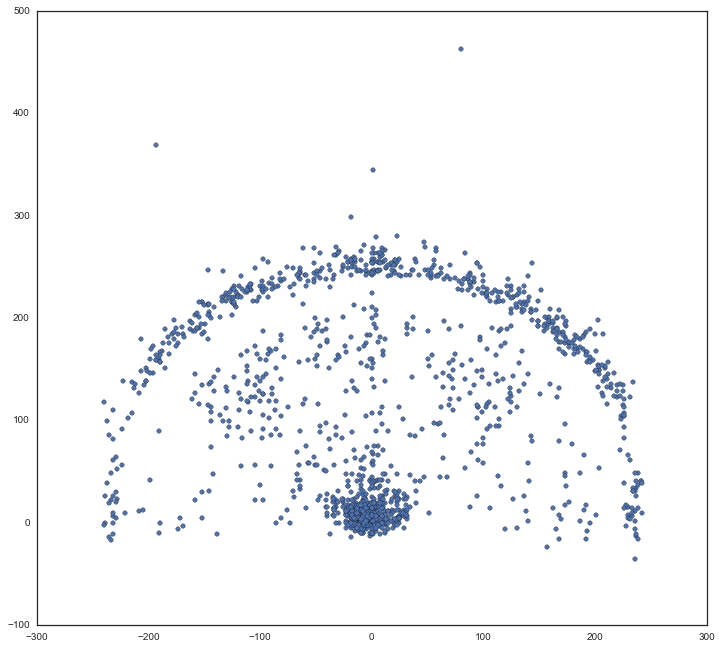

In [6]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
plt.show()

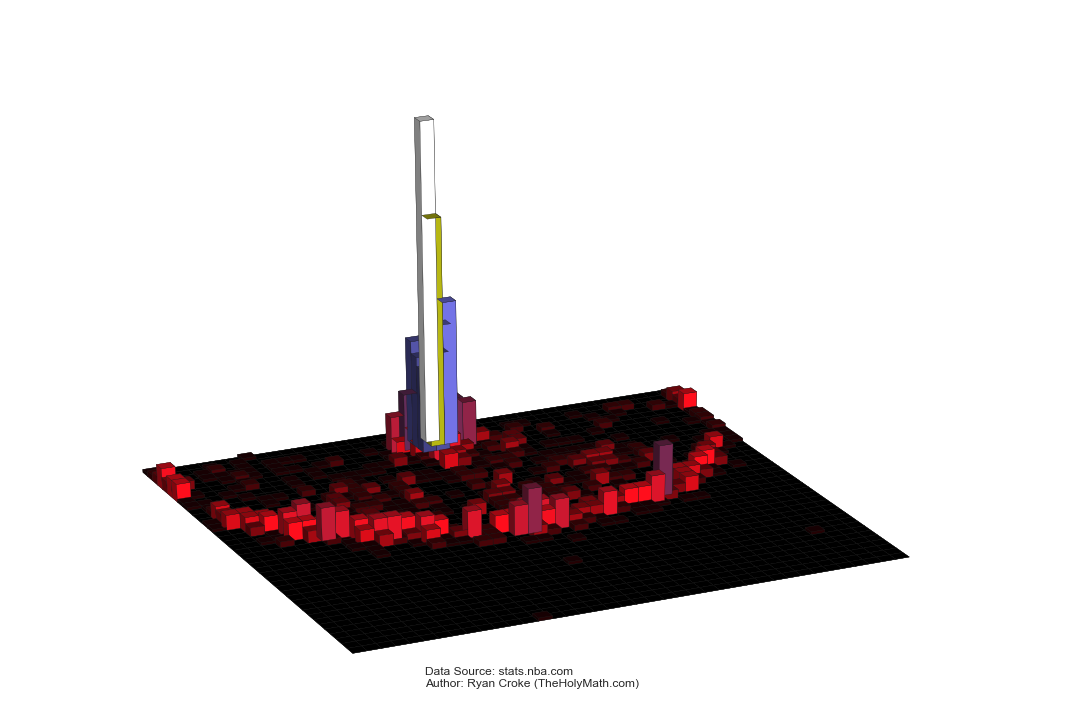

In [220]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,10),facecolor='white')
ax = fig.add_subplot(111, projection='3d')
x = shot_df.LOC_X 
y = shot_df.LOC_Y

hist, xedges, yedges = np.histogram2d(x, y, bins=(40,40))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

import matplotlib.colors as colors

offset = dz + np.abs(dz.min())
fracs = offset.astype(float)/offset.max()
norm = colors.Normalize(fracs.min(), fracs.max())
colors = cm.gist_stern(norm(fracs))



ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors, zsort='average')
ax.mouse_init(rotate_btn=1, zoom_btn=3)
plt.xlabel ("X")
plt.ylabel ("Y")
axes = plt.gca()
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)
#axes.set_xlim([-100,100])
#axes.set_ylim([-35,475])
fig.tight_layout()
ax.autoscale_view('tight')
# Add a title
#ax.set_title('James Harden FGA \n2014-15 Reg. Season', 
#             y=0.6, x=0.2,fontsize=18)

# Add Data Scource and Author
ax.text(340,445,0,'Data Source: stats.nba.com'
        '\nAuthor: Ryan Croke (TheHolyMath.com)',fontsize=12,rotation = 45)
#fig.grid(False)
ax.azim = -25 #rotation about z-axis
plt.savefig('Harden_3D_Shot_Chart.png', bbox_inches='tight')
#ax.elev = 15
plt.axis('off')
plt.show()

In [195]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

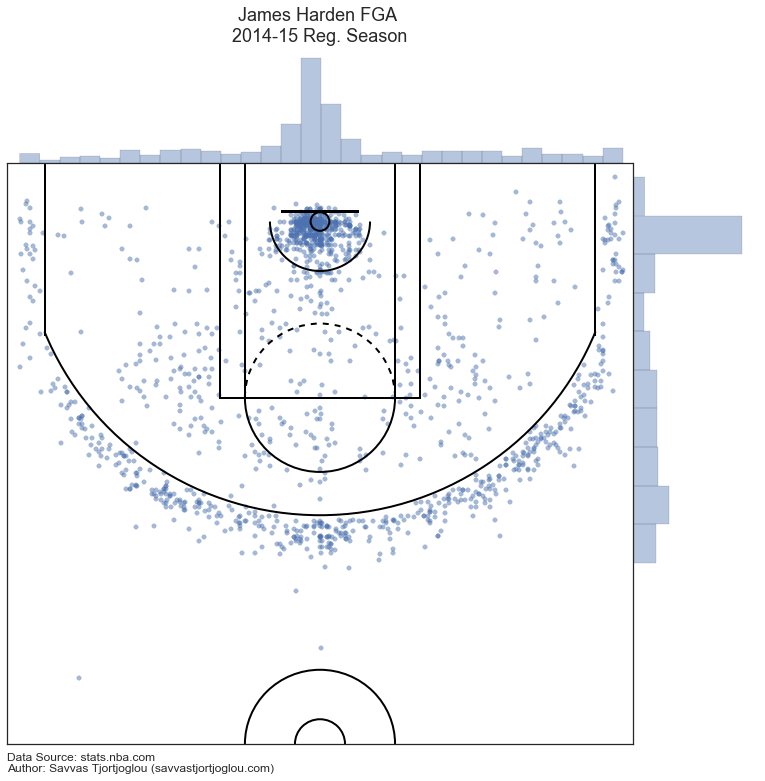

In [206]:
# create our jointplot
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='scatter', space=0, alpha=0.5)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('James Harden FGA \n2014-15 Reg. Season', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(-250,445,'Data Source: stats.nba.com'
        '\nAuthor: Savvas Tjortjoglou (savvastjortjoglou.com)',fontsize=12)

plt.show()

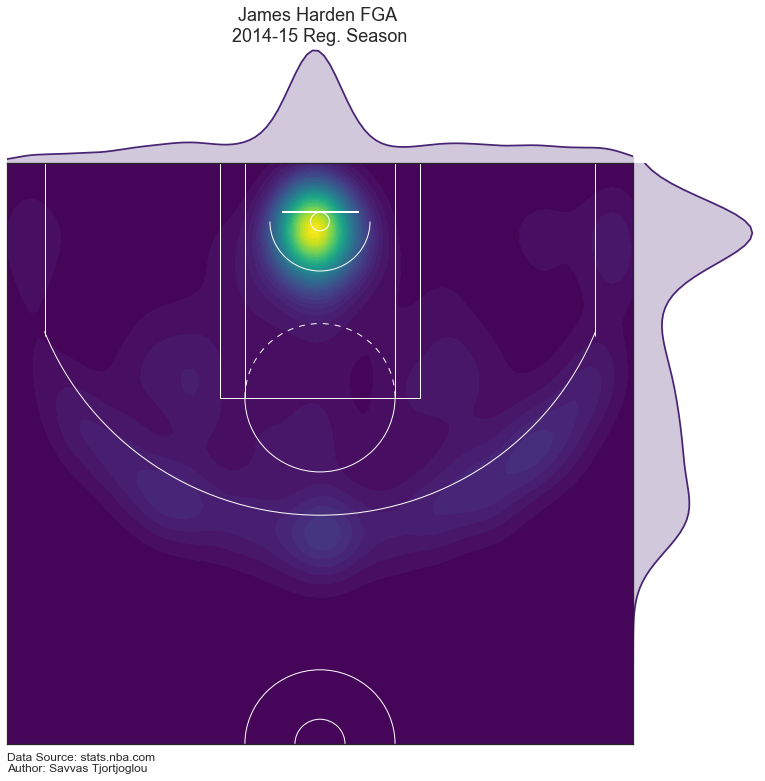

In [221]:
# import the object that contains the viridis colormap
from option_d import test_cm as viridis

# Register and set Viridis as the colormap for the plot
plt.register_cmap(cmap=viridis)
cmap = plt.get_cmap(viridis.name)

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint, 
# It's the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax, color="white", lw=1)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('James Harden FGA \n2014-15 Reg. Season', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(-250,445,'Data Source: stats.nba.com'
        '\nAuthor: Savvas Tjortjoglou', fontsize=12)

plt.savefig('Harden_2D_Shot_Chart.png', bbox_inches='tight')


plt.show()

In [138]:
# Curry Gamelog
filename = 'Curry_Gamelog_2014_2015_2016.csv'
df_c = pd.read_csv(filename, na_values=['na'],index_col='Date')
#print df_538['fran_id']
df_player = df_c[df_c['3P'] != 'Did Not Play'];
twos = []
for row in range(len(df_player['3P'])):
    twos.append(int(df_player['FG'][row]) - int(df_player['3P'][row]))
twos = np.array(twos)
matrix = [[0]*3 for i in range(len(df_player))]
for i in range(len(df_player)):
    matrix[i][0] = float(twos[i])
    matrix[i][1] = float((df_player['3P'][i]))
    matrix[i][2] = float((df_player['FT'][i]))
print matrix
#df_cavs['elo_i'].plot(title='Average pace (minutes per mile)',lw=2);
#plt.plot(df_cavs['elo_i'])

[[5.0, 2.0, 8.0], [7.0, 3.0, 8.0], [5.0, 1.0, 8.0], [5.0, 4.0, 6.0], [7.0, 6.0, 2.0], [6.0, 4.0, 4.0], [7.0, 0.0, 2.0], [3.0, 3.0, 2.0], [5.0, 3.0, 0.0], [5.0, 5.0, 5.0], [1.0, 2.0, 0.0], [3.0, 2.0, 3.0], [4.0, 8.0, 8.0], [3.0, 6.0, 4.0], [8.0, 1.0, 7.0], [4.0, 1.0, 5.0], [5.0, 3.0, 3.0], [5.0, 3.0, 0.0], [4.0, 1.0, 8.0], [9.0, 1.0, 0.0], [5.0, 3.0, 1.0], [6.0, 3.0, 8.0], [5.0, 6.0, 6.0], [8.0, 1.0, 0.0], [9.0, 5.0, 1.0], [4.0, 1.0, 1.0], [8.0, 2.0, 0.0], [4.0, 1.0, 3.0], [5.0, 4.0, 3.0], [1.0, 3.0, 2.0], [5.0, 5.0, 7.0], [6.0, 1.0, 4.0], [4.0, 4.0, 1.0], [5.0, 3.0, 4.0], [6.0, 4.0, 3.0], [4.0, 7.0, 3.0], [4.0, 2.0, 5.0], [7.0, 2.0, 7.0], [5.0, 2.0, 4.0], [4.0, 3.0, 5.0], [1.0, 2.0, 2.0], [5.0, 1.0, 9.0], [7.0, 2.0, 1.0], [5.0, 5.0, 7.0], [5.0, 4.0, 3.0], [4.0, 2.0, 9.0], [6.0, 10.0, 9.0], [4.0, 4.0, 6.0], [3.0, 5.0, 1.0], [4.0, 3.0, 3.0], [7.0, 2.0, 5.0], [4.0, 4.0, 5.0], [6.0, 5.0, 5.0], [2.0, 3.0, 5.0], [5.0, 3.0, 3.0], [9.0, 5.0, 4.0], [2.0, 6.0, 4.0], [0.0, 6.0, 1.0], [1.0, 5.0, 5

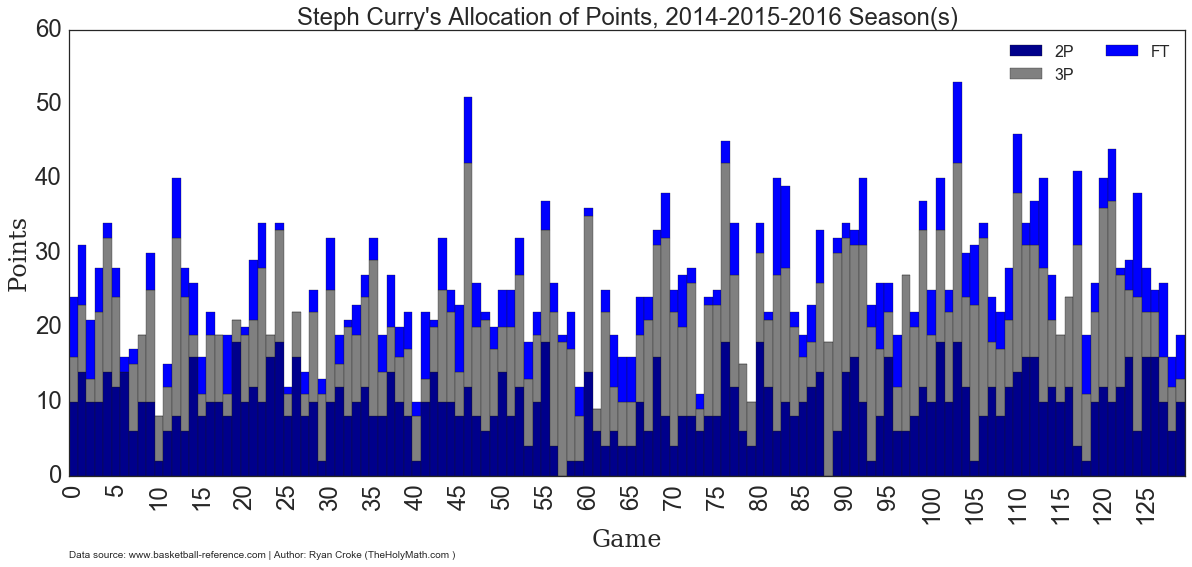

In [227]:
plt.figure(figsize=(20, 8), dpi=80)
#for key, value in my_dictionary.items():
#    print(key, value)
N = len(df_player) # number of years
ind = np.arange(N) + 0.5  # the x locations for the groups
ind = [ind[5*i] for i in range(0,26)]
axis_font = {'fontname':'Serif', 'size':'24'}
plt.xlabel("Game",**axis_font)
plt.ylabel("Points", **axis_font)
years = [x*5 for x in range(0,len(df_player))]
plt.xticks(ind,years,fontsize = 24,rotation='vertical')
plt.yticks(fontsize = 24)
#plt.bar(range(0,len(rating)),rating,1)

width = 1
for i in xrange(len(df_player)):
    p1 = plt.bar(i, twos[i]*2, width, color='darkblue')
    p2 = plt.bar(i, int(df_player['3P'][i])*3, width, color='grey', bottom=twos[i]*2)
    p3 = plt.bar(i, int(df_player['FT'][i]), width, color='blue', bottom=(int(df_player['3P'][i])*3+twos[i]*2))
    
plt.legend([p1,p2,p3],['2P', '3P','FT'],loc='best',ncol=2,prop={'size':16})
plt.title('Steph Curry\'s Allocation of Points, 2014-2015-2016 Season(s)',fontsize=24)
text(0, -11, "Data source: www.basketball-reference.com | "  "Author: Ryan Croke (TheHolyMath.com )", fontsize=10)
plt.savefig('Curry_Raw.png', bbox_inches='tight')

In [140]:
# As an allocation of percentage
matrix_p = [[0]*3 for i in range(len(df_player))]
for i in xrange(len(df_player)):
    divisor = matrix[i][1]*3.0 + matrix[i][2] + matrix[i][0]*2.0
    matrix_p[i][0] = float(matrix[i][0]*2)/divisor
    matrix_p[i][1] = float(matrix[i][1]*3)/divisor
    matrix_p[i][2] = float(matrix[i][2])/divisor

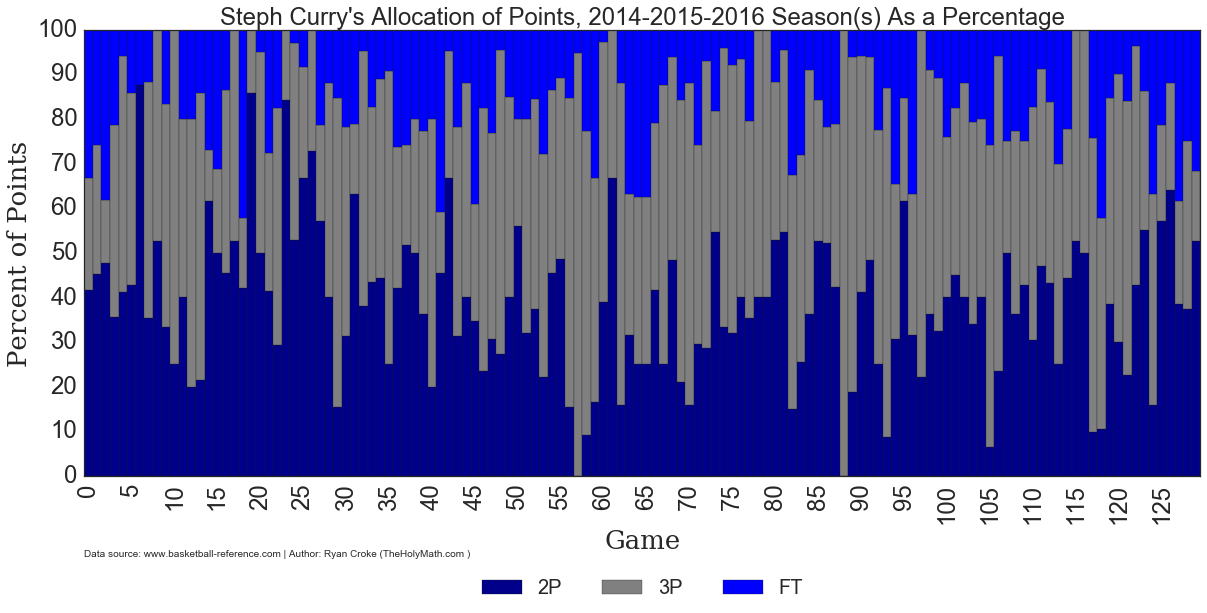

In [228]:
plt.figure(figsize=(20, 8), dpi=80)
#for key, value in my_dictionary.items():
#    print(key, value)
N = len(df_player) # number of years
ind = np.arange(N) +0.5 # the x locations for the groups
ind = [ind[5*i] for i in range(0,26)]
per = range(111)
per = per[0::10]
indy = np.arange(N)/10.0
axis_font = {'fontname':'Serif', 'size':'26'}
plt.xlabel("Game",**axis_font)
plt.ylabel("Percent of Points", **axis_font)
years = [x*5 for x in range(0,len(df_player))]
plt.xticks(ind,years,fontsize = 24,rotation='vertical')
plt.yticks(indy,per,fontsize = 24)
#plt.bar(range(0,len(rating)),rating,1)

width = 1
for i in xrange(len(df_player)):
    p1 = plt.bar(i, matrix_p[i][0], width, color='darkblue')
    p2 = plt.bar(i, matrix_p[i][1], width, color='grey', bottom=matrix_p[i][0])
    p3 = plt.bar(i, matrix_p[i][2], width, color='blue', bottom=(matrix_p[i][1]+matrix_p[i][0]))
plt.legend([p1, p2,p3],['2P', '3P','FT'],loc='upper center', bbox_to_anchor=(0.5, -0.19),
          fancybox=True, shadow=True, ncol=6,prop={'size':20})
plt.title('Steph Curry\'s Allocation of Points, 2014-2015-2016 Season(s) As a Percentage',fontsize=24)
text(0, -0.18, "Data source: www.basketball-reference.com | "  "Author: Ryan Croke (TheHolyMath.com )", fontsize=10)
plt.savefig('Steph_Curry_Raw_Percent.png', bbox_inches='tight')

In [246]:
# Linear fit of shots 2P vs. 3P
three = np.array(df_player['FTA'])
three = three.astype(float)
x = np.linspace(1,len(df_player),len(df_player))
y = three
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [247]:
slope

0.01929017192642259